# Exemple de construction d'un model de <u> reconaissance de chiffre </u>

## Importation de les laibrairies

In [29]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt

## Télécharger une dataset qui contient 70.000 image (28x28)

In [48]:
mnist = fetch_openml('mnist_784', version=1)

### Bien Virifier la taille 

In [51]:
# Le dataset principal qui contient toutes les images
print (mnist.data.shape)
# Le vecteur d'annotations associé au dataset (nombre entre 0 et 9)
print (mnist.target.shape)

(70000, 784)
(70000,)


### Échantillonner

In [57]:
sample = np.random.randint(70000, size=5000)
data = mnist.data.values[sample]
target = mnist.target.values[sample]

### Séparez training / testing set

In [58]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=0.8)

## KNN

### Pour k=3, La model va s'entrainer sur l'échantillion d'apprentissage

In [59]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

### On va vérifier le model avec l'échantillion de test

In [60]:
error = 1 - knn.score(xtest, ytest)
print('Erreur: %f' % error)

Erreur: 0.056000


## Améliorer le model pour optimiser le score sur les données test

### Chercher k optimal

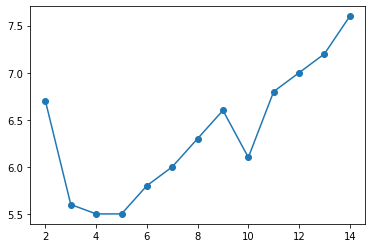

In [61]:
errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
plt.plot(range(2,15), errors, 'o-')
plt.show()

### Voir les donnée bien prédit

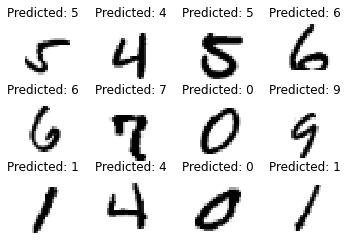

In [62]:
# On récupère le classifieur le plus performant
knn = neighbors.KNeighborsClassifier(5)
knn.fit(xtrain, ytrain)

# On récupère les prédictions sur les données test
predicted = knn.predict(xtest)

# On redimensionne les données sous forme d'images
images = xtest.reshape((-1, 28, 28))

# On selectionne un echantillon de 12 images au hasard
select = np.random.randint(images.shape[0], size=12)

# On affiche les images avec la prédiction associée
fig,ax = plt.subplots(3,4)
for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format( predicted[value]) )

plt.show()

### Voir les données mal prédit

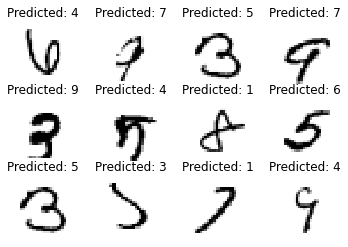

In [63]:
# on récupère les données mal prédites
misclass = (ytest != predicted)
misclass_images = images[misclass,:,:]
misclass_predicted = predicted[misclass]

# on sélectionne un échantillon de ces images
select = np.random.randint(misclass_images.shape[0], size=12)

# on affiche les images et les prédictions (erronées) associées à ces images
for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(misclass_images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format(misclass_predicted[value]) )

plt.show()